About the Dataset:

1. Id: unique id for a news article
2. Title: Title of the news article
3. Text: Text of the article; Can be complete or Incomplete.
4. Subject : News
5. Date : Publication Date Of The News
6. Class: Label that marks whether the news article is real or fake:
    0: Fake news
    1: Real News(Not Fake)
    

About The Project :

A Fake News Detection System helps find out whether the news is true or false. It is very important because fake news can spread lies, create panic, harm someone’s image, or even cause fights between countries or communities. It protects people from believing wrong information and helps keep peace and trust in society.

Recent Example :

Example 1: India vs Pakistan War 2025
During the 2025 India-Pakistan war, some Indian news channels showed fake videos of Indian airstrikes that were actually from video games and old clips. This caused global embarrassment for India and raised questions about media credibility.

Example 2: COVID-19 Misinformation
In the early COVID-19 days, fake news like “alcohol kills the virus” or blaming certain communities led to dangerous actions and increased social tension.

#Stages Of Project

i.)    Data Cleaning
ii.)   EDA (Exploratory data analysis)
iii.)  Data Or Text Preprocessing
iv.)   Model Building
v.)    Evaluation
vi.)   Improvement
vii.)  Website


In [1]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score , precision_score ,confusion_matrix, recall_score , f1_score
from sklearn.metrics import classification_report
import pickle

In [2]:
###### loading the dataset to a pandas DataFrame
data_fake=pd.read_csv(r"C:\Users\Abhineet\Desktop\FAKENWS\Dataset\Fake.csv")
data_true=pd.read_csv(r"C:\Users\Abhineet\Desktop\FAKENWS\Dataset\True.csv")

# i.) Data Cleaning 

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [8]:
data_fake["class"]=0
data_true['class']=1

In [9]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [10]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [11]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [15]:
#count of missing values
data.isnull().sum() 

text     0
class    0
dtype: int64

In [16]:
## Randomly Shuffling The Dataset
data = data.sample(frac = 1)

In [17]:
data.head()

,text,class
12820,ROME (Reuters) - Italy s anti-establishment 5-...,1
9276,Tucker Carlson had an intense debate with Clin...,0
9795,***WARNING***This video will make your blood b...,0
11461,"On March 6, newly-minted Secretary of Housing ...",0
16375,HELSINKI (Reuters) - Four people were killed a...,1


In [18]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [19]:
data.columns

Index(['text', 'class'], dtype='object')

In [20]:
data.head()

,text,class
0,ROME (Reuters) - Italy s anti-establishment 5-...,1
1,Tucker Carlson had an intense debate with Clin...,0
2,***WARNING***This video will make your blood b...,0
3,"On March 6, newly-minted Secretary of Housing ...",0
4,HELSINKI (Reuters) - Four people were killed a...,1


data.head()

In [21]:
news_dataset = data

In [22]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44878 entries, 0 to 44877
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   class   44878 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.3+ KB


In [23]:
numeric_data = news_dataset.select_dtypes(include = [np.number])

In [25]:
# no of 0 (news is Real) and 1 (news is Fake) in label

news_dataset['class'].value_counts()



class
0    23471
1    21407
Name: count, dtype: int64

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [26]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

# ii.) EDA

In [27]:
news_dataset.head()

,text,class
0,ROME (Reuters) - Italy s anti-establishment 5-...,1
1,Tucker Carlson had an intense debate with Clin...,0
2,***WARNING***This video will make your blood b...,0
3,"On March 6, newly-minted Secretary of Housing ...",0
4,HELSINKI (Reuters) - Four people were killed a...,1


In [28]:
news_dataset['class'].value_counts()


class
0    23471
1    21407
Name: count, dtype: int64

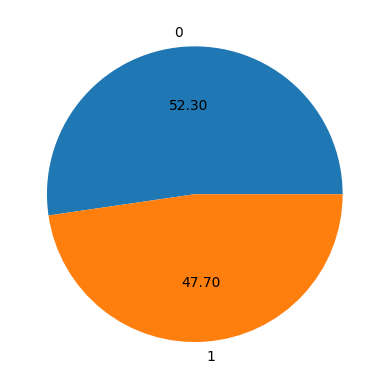

In [30]:
import matplotlib.pyplot as plt
plt.pie(news_dataset['class'].value_counts(), labels=['0','1'],autopct="%0.2f")
plt.show()


In [13]:
# Data Is Balanced 

In [31]:
z_scores = news_dataset.select_dtypes(include=['number']).apply(zscore)

# Set a threshold for Z-score (commonly 3)
outliers = (abs(z_scores) > 3)

In [32]:
# Check if any outliers exist
print("Any outliers?", outliers.any().any())

Any outliers? False


In [33]:
# We don't have any Outliers in our Dataset.

# iii.) Data Or Text Pre Processing
       
       -> Removing Stopwords 
       -> Feature Transformation
       -> Tokenization
       -> Stemming

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhineet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
#printing the stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [37]:
print(news_dataset)


                                                    text  class
0      ROME (Reuters) - Italy s anti-establishment 5-...      1
1      Tucker Carlson had an intense debate with Clin...      0
2      ***WARNING***This video will make your blood b...      0
3      On March 6, newly-minted Secretary of Housing ...      0
4      HELSINKI (Reuters) - Four people were killed a...      1
...                                                  ...    ...
44873  BURLINGAME, Calif. (Reuters) - U.S. presidenti...      1
44874  KIEV (Reuters) - Several thousand people march...      1
44875  Who says President Trump isn t moving on his a...      0
44876  BRUSSELS/BERLIN (Reuters) - On the eve of his ...      1
44877  After being assaulted by Trump haters, the Tru...      0

[44878 rows x 2 columns]


In [38]:
# separating the data & class
X = news_dataset.drop(columns='class', axis=1)
Y = news_dataset['class']

In [39]:
print(X)
print(Y)

                                                    text
0      ROME (Reuters) - Italy s anti-establishment 5-...
1      Tucker Carlson had an intense debate with Clin...
2      ***WARNING***This video will make your blood b...
3      On March 6, newly-minted Secretary of Housing ...
4      HELSINKI (Reuters) - Four people were killed a...
...                                                  ...
44873  BURLINGAME, Calif. (Reuters) - U.S. presidenti...
44874  KIEV (Reuters) - Several thousand people march...
44875  Who says President Trump isn t moving on his a...
44876  BRUSSELS/BERLIN (Reuters) - On the eve of his ...
44877  After being assaulted by Trump haters, the Tru...

[44878 rows x 1 columns]
0        1
1        0
2        0
3        0
4        1
        ..
44873    1
44874    1
44875    0
44876    1
44877    0
Name: class, Length: 44878, dtype: int64


In [40]:
port_stem = PorterStemmer()

In [ ]:
def clean_and_stem(text):

    port_stem = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs, HTML, brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 4. Tokenize and remove stopwords + stem
    tokens = text.split()
    stemmed = [port_stem.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(stemmed)

In [48]:
news_dataset['text'] = news_dataset['text'].apply(clean_and_stem)

In [49]:
print(news_dataset['text'])

0        rome reuter itali antiestablish star movement ...
1        tucker carlson intens debat clinton advis paid...
2        warningthi video make blood boil exchang hispa...
3        march newlymint secretari hous urban develop h...
4        helsinki reuter four peopl kill sever injur tr...
                               ...                        
44873    burlingam calif reuter us presidenti candid te...
44874    kiev reuter sever thousand peopl march central...
44875    say presid trump move agenda neil gorsuch beca...
44876    brusselsberlin reuter eve trip europ rex tille...
44877              assault trump hater trump support speak
Name: text, Length: 44878, dtype: object


In [55]:
#separating the data and label
x = news_dataset['text'].values
y = news_dataset['class'].values

In [56]:
print(x)

['rome reuter itali antiestablish star movement support european union want signific lawmak power transfer govern european parliament leader luigi di maio told reuter star lead opinion poll ahead elect held may tri reassur itali partner financi market trust govern distanc previous euroscept posit proeu intend contribut creat futur europ yearold lower hous deputi elect septemb star leader prime minist candid said interview said star win power negoti itali partner tri set euwid welfar polici tackl grow poverti inequ mani countri bloc includ itali eu fourth largest economi reform eu solut mani problem di maio said call lawmak power european parliament directli elect eu bodi said star stanc europ euro shift sinc lobbi referendum take itali common currenc zone join euroscept group britain unit kingdom independ parti ukip european parliament said defeat tradit parti franc difficulti form stabl major govern germani spain portug meant longer wide eu support auster polici star oppos total withd

In [57]:
print(y)

[1 0 0 ... 0 1 0]


In [58]:
y.shape

(44878,)

Splitting Our Data Into Training And Test Data

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25 , stratify=y, random_state=2)


In [62]:
#converting the textual data to numerical data
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [64]:
print(X)

['rome reuter itali antiestablish star movement support european union want signific lawmak power transfer govern european parliament leader luigi di maio told reuter star lead opinion poll ahead elect held may tri reassur itali partner financi market trust govern distanc previous euroscept posit proeu intend contribut creat futur europ yearold lower hous deputi elect septemb star leader prime minist candid said interview said star win power negoti itali partner tri set euwid welfar polici tackl grow poverti inequ mani countri bloc includ itali eu fourth largest economi reform eu solut mani problem di maio said call lawmak power european parliament directli elect eu bodi said star stanc europ euro shift sinc lobbi referendum take itali common currenc zone join euroscept group britain unit kingdom independ parti ukip european parliament said defeat tradit parti franc difficulti form stabl major govern germani spain portug meant longer wide eu support auster polici star oppos total withd

#  iv.) Model Training: 

In [66]:
# LOGISTIC REGRESSION
LR = LogisticRegression()

In [67]:
LR.fit(xv_train, y_train)

LogisticRegression()

In [70]:
pred_lr = LR.predict(xv_test)

In [71]:
LR.score(xv_test, y_test)

0.9857397504456328

In [73]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.99      0.98      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [74]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)    

DecisionTreeClassifier()

In [75]:
pred_dt = DT.predict(xv_test)

In [76]:
DT.score(xv_test, y_test)

0.9967914438502674

In [78]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.99      0.98      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
#XGradient Boost Classifier
XGB = XGBClassifier(
    n_estimators=100,        # can change this based on your tuning
    learning_rate=0.1,       # Default is 0.3; 0.1 is commonly used
    max_depth=3,             # Default is 6; can be tuned
    use_label_encoder=False, # Suppress warning
    eval_metric='logloss',   # Required if use_label_encoder=False
    random_state=0
)
XGB.fit(xv_train, y_train)

c:\Users\Abhineet\Desktop\FAKENWS\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:02:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [113]:
pred_gb = XGB.predict(xv_test)

In [114]:
XGB.score(xv_test, y_test)

0.9954545454545455

In [115]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5868
           1       0.99      1.00      1.00      5352

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [119]:
#Bagging Classifier
bcg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # you can change this to any classifier
    n_estimators=50,                          # number of base estimators
    random_state=0
)

In [121]:
bcg.fit(xv_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=0)

In [122]:
pred_rf = bcg.predict(xv_test)

In [123]:
bcg.score(xv_test, y_test)

0.9973262032085561

In [124]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5868
           1       1.00      1.00      1.00      5352

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [90]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [91]:
def train_classifier(clf,xv_train,y_train,xv_test,y_test):
    clf.fit(xv_train,y_train)
    Y_pred = clf.predict(xv_test)
    accuracy = accuracy_score(y_test,Y_pred)
    precision = precision_score(y_test, Y_pred, average='binary')
    
    return accuracy,precision

In [94]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, xv_train,y_train,xv_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9927807486631016
Precision -  0.9903255813953489
For  KN
Accuracy -  0.6887700534759358
Precision -  0.9432793136320305
For  NB
Accuracy -  0.9380570409982175
Precision -  0.9301681138001109
For  DT
Accuracy -  0.9949197860962566
Precision -  0.9921918572225321
For  LR
Accuracy -  0.9943850267379679
Precision -  0.992
For  RF
Accuracy -  0.9850267379679144
Precision -  0.9857571214392804


c:\Users\Abhineet\Desktop\FAKENWS\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9942959001782531
Precision -  0.9918154761904762
For  BgC
Accuracy -  0.9972370766488413
Precision -  0.9966399103976106
For  ETC
Accuracy -  0.9784313725490196
Precision -  0.974025974025974
For  GBDT
Accuracy -  0.9949197860962566
Precision -  0.9918261192643507
For  xgb
Accuracy -  0.9972370766488413
Precision -  0.9962693527326991


In [95]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [96]:
performance_df

,Algorithm,Accuracy,Precision
10,xgb,0.997237,0.996269
7,BgC,0.997237,0.996640
3,DT,0.994920,0.992192
9,GBDT,0.994920,0.991826
4,LR,0.994385,0.992000
6,AdaBoost,0.994296,0.991815
0,SVC,0.992781,0.990326
5,RF,0.985027,0.985757
8,ETC,0.978431,0.974026
2,NB,0.938057,0.930168


In [97]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [98]:
performance_df1

,Algorithm,variable,value
0,xgb,Accuracy,0.997237
1,BgC,Accuracy,0.997237
2,DT,Accuracy,0.994920
3,GBDT,Accuracy,0.994920
4,LR,Accuracy,0.994385
5,AdaBoost,Accuracy,0.994296
6,SVC,Accuracy,0.992781
7,RF,Accuracy,0.985027
8,ETC,Accuracy,0.978431
9,NB,Accuracy,0.938057


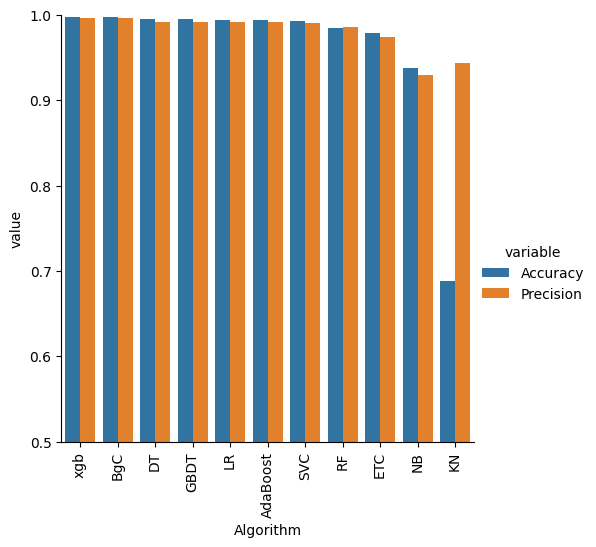

In [99]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# vi.) model improve
        
   -> Change the max_features parameter of TfIdf

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [102]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [103]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [105]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,xgb,0.997237,0.996269,0.997237,0.996269,0.997237,0.996269,0.997237,0.996269
1,BgC,0.997237,0.996640,0.997237,0.996640,0.997237,0.996640,0.997237,0.996640
2,DT,0.994920,0.992192,0.994920,0.992192,0.994920,0.992192,0.994920,0.992192
3,GBDT,0.994920,0.991826,0.994920,0.991826,0.994920,0.991826,0.994920,0.991826
4,LR,0.994385,0.992000,0.994385,0.992000,0.994385,0.992000,0.994385,0.992000
5,AdaBoost,0.994296,0.991815,0.994296,0.991815,0.994296,0.991815,0.994296,0.991815
6,SVC,0.992781,0.990326,0.992781,0.990326,0.992781,0.990326,0.992781,0.990326
7,RF,0.985027,0.985757,0.985027,0.985757,0.985027,0.985757,0.985027,0.985757
8,ETC,0.978431,0.974026,0.978431,0.974026,0.978431,0.974026,0.978431,0.974026
9,NB,0.938057,0.930168,0.938057,0.930168,0.938057,0.930168,0.938057,0.930168


# Creating A Voting Classifier

In [106]:
# Voting Classifier
xgb = XGBClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=2)



from sklearn.ensemble import VotingClassifier

In [107]:
voting = VotingClassifier(estimators=[('bg', bgc), ('xg', xgb)],voting='soft')

In [108]:
voting.fit(xv_train,y_train)

VotingClassifier(estimators=[('bg',
                              BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                n_estimators=50,
                                                random_state=2)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [109]:
y_pred = voting.predict(xv_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9972370766488413
Precision 0.9964545624183616


In [ ]:
# No Improvement , Thus we will go with the models with highest accuracy & precision (Bcg & Xgboost Classifier)

Creating A Manual Predicting System

In [ ]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(clean_and_stem)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_XGB = XGB.predict(new_xv_test)
    pred_bcg = bcg.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nXGB Prediction: {} \nbcg Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_XGB[0]),
                                                                                                             output_lable(pred_bcg[0])))

In [ ]:
# Manual Entry
news = str(input()) 
manual_testing(news)

In [125]:
# Pickle Vectorizer

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorization, f)


In [126]:
# Pickle Model

with open("model_xgb.pkl", "wb") as f:
    pickle.dump(XGB, f)

with open("model_bcg.pkl", "wb") as f:
    pickle.dump(bcg, f)